## Housing Prices in Singapore

This exercise will attempt to predict resale housing prices in Singapore

In [1]:
# data 
import pandas as pd

# directories
import os
os.getcwd() #wd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# for saving figures
root_dir = "."
image_dir = os.path.join(root_dir, "HW1 Images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(image_dir, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
# Set the relative director for training data
root_dir = "."
train_data_dir = root_dir + "/HW1 Data/train.csv"
test_data_dir = root_dir + "/HW1 Data/test.csv"

# read the data frame
train_data = pd.read_csv(train_data_dir)
test_data = pd.read_csv(test_data_dir)

# Print out number of instances for each dataset
print("Training Data has {0} instances".format(len(train_data)))
print("Test Data has {0} instances".format(len(test_data)))

Training Data has 607992 instances
Test Data has 151999 instances


In [4]:
print(train_data.columns)
train_data.describe()

Index(['index', 'block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town', 'latitude', 'longitude', 'postal_code', 'floor'],
      dtype='object')


,index,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,postal_code,floor
count,607992.000000,607992.000000,607992.000000,6.079920e+05,607992.000000,607992.000000,607992.000000,607992.000000
mean,303995.500000,95.542603,1986.547621,2.815431e+05,1.360492,103.838869,530443.042961,7.457277
std,175512.316769,26.191181,8.792567,1.414718e+05,0.041371,0.074209,180497.930226,4.504902
min,0.000000,28.000000,1966.000000,5.600000e+03,1.270380,103.685228,50004.000000,2.000000
25%,151997.750000,72.000000,1980.000000,1.750000e+05,1.333037,103.772579,460501.000000,5.000000
50%,303995.500000,93.000000,1985.000000,2.630000e+05,1.353276,103.842318,550140.000000,8.000000
75%,455993.250000,115.000000,1993.000000,3.688000e+05,1.379559,103.897606,650503.000000,11.000000
max,607991.000000,307.000000,2015.000000,1.180000e+06,1.457071,103.987805,825195.000000,50.000000


#### The Plan
1. Data Exploration
2. Splitting Postal Code
3. Plotting Housing Prices 

### Data Exploration

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 15 columns):
index                  607992 non-null int64
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
resale_price           607992 non-null float64
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 69.6+ MB


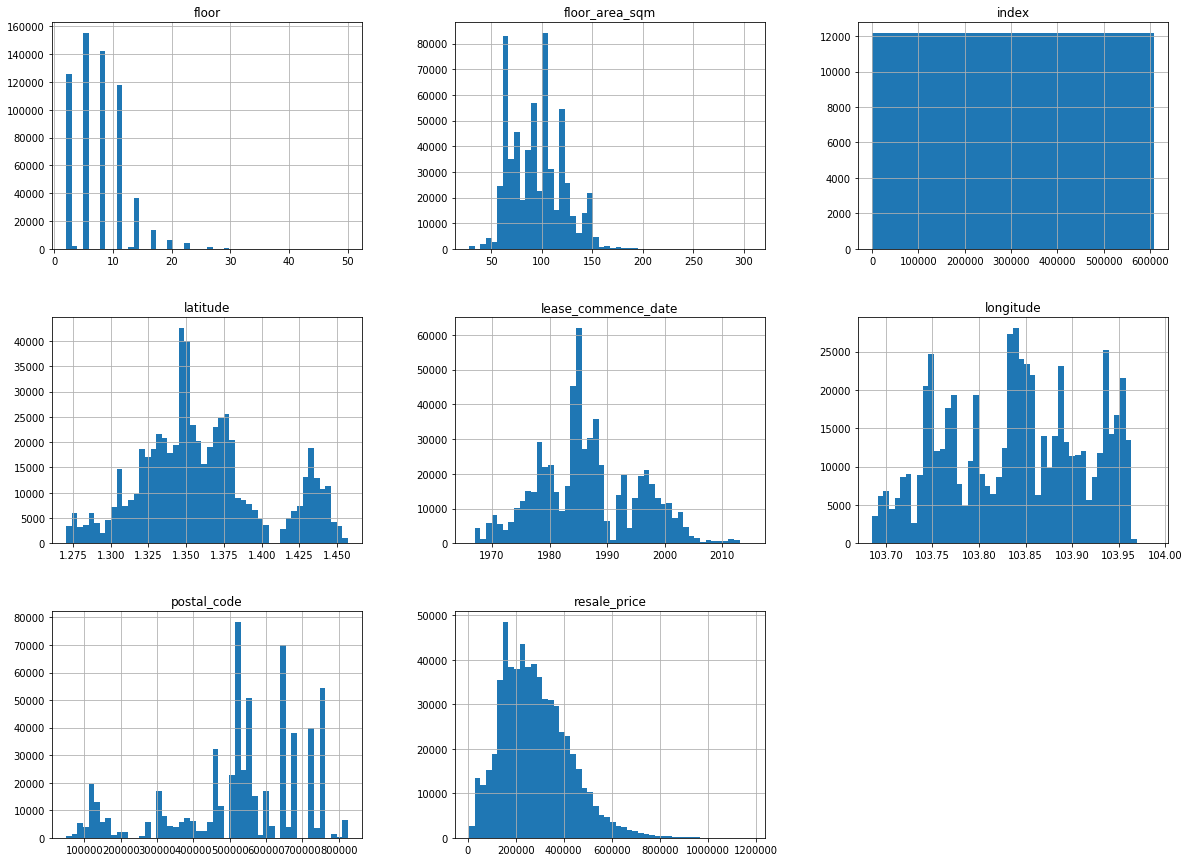

In [6]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

Saving figure visualization_plot


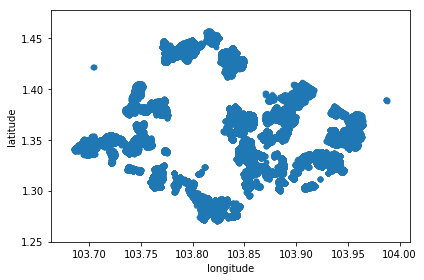

In [7]:
train_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("visualization_plot")

In [9]:
# Splitting y_train
y_train_data = train_data.loc[:,'resale_price']
y_train_data.head()

0    312000.0
1    415000.0
2    545000.0
3      7000.0
4    278000.0
Name: resale_price, dtype: float64

In [10]:
# Getting x_train_data and x_test_data

x_train_data = train_data.loc[:, train_data.columns != 'resale_price']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'index']
x_train_data.info()

x_test_data = test_data
x_test_data = x_test_data.loc[:, x_test_data.columns != 'index']
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 13 columns):
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151999 entries, 0 to 151998
Data columns (total 13 columns):
block                  151999 non-null object
flat_model             151999 non-null object
flat_type              15

### Data Preparation

In [11]:
#filling NA's with the median of the column:
x_train_data = x_train_data.fillna(x_train_data.median())
x_test_data = x_test_data.fillna(x_test_data.median())

One Hot Encoding

In [12]:
x_train_data = pd.get_dummies(x_train_data)

# Visualize
x_train_data.columns

Index(['floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'postal_code', 'floor', 'block_1', 'block_10', 'block_100', 'block_101',
       ...
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN'],
      dtype='object', length=3138)

In [13]:
x_train_data.head()

,floor_area_sqm,lease_commence_date,latitude,longitude,postal_code,floor,block_1,block_10,block_100,block_101,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,105.0,1992,1.361615,103.843937,570250,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,121.0,1987,1.436284,103.831607,760166,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,93.0,2012,1.406081,103.906438,824306,11,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,29.0,1969,1.288226,103.831906,161033,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98.0,1985,1.353288,103.865796,550312,11,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Model Selection

Linear

In [ ]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train_data, y_train_data)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train_data, y_train_data,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)